In [211]:
import pandas as pd
import numpy as np

import re
import json
import sys
sys.path.append('../code')

from preprocessing import GlowpickPreprocessing
from loaddata import load
from gensim.models import FastText

In [269]:
brand_lst = products.brand
pattern = '[^\w\s]'
re.sub(pattern, '', brand_lst[0])

'코스알엑스 COSRX'

In [270]:
products.brand.nunique()

2073

In [122]:
data = pd.read_csv('../dataset/glowpick_info.csv')
print(data.shape)

(12243, 3)


In [206]:
pickle.dump(sent_vec, open('description.pickle','wb'))

In [207]:
pickle.dump(sent_vec_tags, open('tags.pickle','wb'))

In [210]:
embed = pickle.load(open('../saved_file/new_pre_embed.pickle','rb'))

In [212]:
def load():
    # Load data
    print('[{0:15s}] Load data...'.format('LOAD'), end='')
    data = pd.read_csv('../dataset/glowpick_reviews.csv')
    products = pd.read_csv('../dataset/glowpick_products.csv')
    infos = pd.read_csv('../dataset/glowpick_info.csv')
    print('(data.shape: ,{})'.format(data.shape) ,end='')
    print('(products.shape: ,{})'.format(products.shape), end='')
    print('(infos.shape: ,{})'.format(infos.shape))

    # filtering 여성용품
    if '여성용품' in products.title.unique():
        print('[{0:15s}] filtering data...'.format('LOAD'), end='')
        data_prod = pd.merge(data, products, on='product_url', how='left')

        # 1. 남성화장품
        male_cosmetic = data_prod[data_prod.title=='남성화장품']
        # 2. not 남성화장품 and male
        male_reviews = data_prod[(data_prod.title!='남성화장품')&(data_prod.sex=='m')]
        # concat 1,2
        data = pd.concat([male_cosmetic, male_reviews], axis=0)

        data = data.rename(columns={'rate_x':'rate'})
        data = data[['user_id','rate','content','product_url']].drop_duplicates()
        print(f'(filtering data shape: {data.shape}')

    return data, products, infos

In [213]:
data, products, infos = load()

[LOAD           ] Load data...(data.shape: ,(461659, 7))(products.shape: ,(12698, 9))(infos.shape: ,(12243, 3))
[LOAD           ] filtering data...(filtering data shape: (10390, 4)


In [226]:
products.product_url.nunique()

12243

In [225]:
infos.

(12243, 3)

In [230]:
embed_df = pd.DataFrame(embed)
embed_df['product_url'] = data.product_url.values

In [233]:
sent_vec_df = pd.DataFrame(sent_vec)
sent_vec_df['product_url'] = infos.product_url.values

In [239]:
x_embed = [f'{i}_x' for i in range(100)]
y_embed = [f'{i}_y' for i in range(100)]

In [242]:
embed_join = pd.merge(embed_df, sent_vec_df, on='product_url', how='left')

In [247]:
(embed_join[x_embed].values + embed_join[y_embed].values).shape

(10390, 100)

In [248]:
def l2norm(embed_matrix):
    norm = np.sqrt(np.power(embed_matrix,2).sum(axis=1))
    norm = np.expand_dims(norm, axis=1)
    embed_matrix = embed_matrix / norm
    return embed_matrix 

/home/jaehyuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   426.,   7896.,  42381., 189018., 357546., 296217., 229047.,
         86563.,  12160.,   1546.]),
 array([-0.39315536, -0.31645744, -0.23975951, -0.16306158, -0.08636365,
        -0.00966573,  0.0670322 ,  0.14373013,  0.22042806,  0.29712598,
         0.37382391]),
 <a list of 10 Patch objects>)

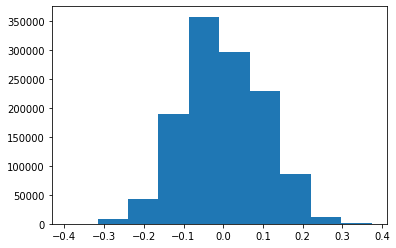

In [252]:
plt.hist(l2norm(sent_vec).reshape(-1))

/home/jaehyuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 23885.,  29783., 134257., 182228., 231279., 298521., 211161.,
         51078.,  34133.,  10375.]),
 array([-0.2913866 , -0.23269267, -0.17399873, -0.1153048 , -0.05661087,
         0.00208307,  0.060777  ,  0.11947094,  0.17816487,  0.23685881,
         0.29555274]),
 <a list of 10 Patch objects>)

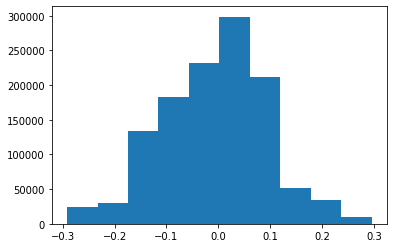

In [253]:
plt.hist(l2norm(sent_vec_tags).reshape(-1))